In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
predictions = pd.read_csv('predictions.txt', header=None)[0].tolist()
truth = pd.read_csv('truth.txt', header=None)[0].tolist()
classes = ['Jedi', 'Sith']

In [156]:
def confusion_matrix(true, pred, labels):
    num_labels = len(labels)
    shape = (num_labels, num_labels)
    mat = np.zeros(shape, dtype=int)
    
    for t, p in zip(true, pred):
        i = labels.index(t)
        j = labels.index(p)
        mat[i, j] += 1
    
    return mat

In [157]:
cm = confusion_matrix(truth, predictions, labels=classes)

TP = cm[0, 0]
FP = cm[1, 0]
FN = cm[0, 1]
TN = cm[1, 1]

precision_jedi = TP / (TP + FP)
recall_jedi = TP / (TP + FN)
f1_jedi = 2 * ((precision_jedi * recall_jedi) / (precision_jedi + recall_jedi))
total_jedi = TP + FN

precision_sith = TN / (TN + FN)
recall_sith = TN / (TN + FP)
f1_sith = 2 * ((precision_sith * recall_sith) / (precision_sith + recall_sith))
total_sith = TN + FP

accuracy = (TP + TN) / (TP + FP + FN + TN)
total = TP + FP + FN + TN

In [158]:
print("       precision  recall  f1-score  total")
print(f"Jedi   {precision_jedi:.2f}       {recall_jedi:.2f}    {f1_jedi:.2f}      {total_jedi}")
print(f"Sith   {precision_sith:.2f}       {recall_sith:.2f}    {f1_sith:.2f}      {total_sith}\n")
print(f"accuracy                  {accuracy:.2f}      {total}\n")
print(cm)

       precision  recall  f1-score  total
Jedi   0.45       0.51    0.48      49
Sith   0.47       0.41    0.44      51

accuracy                  0.46      100

[[25 24]
 [30 21]]


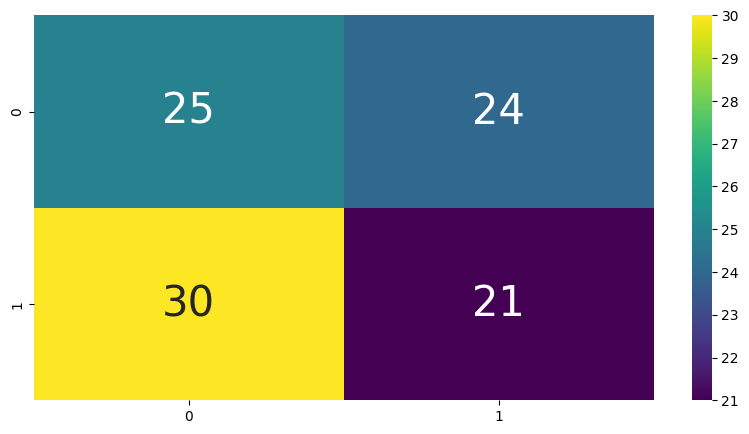

In [159]:
plt.figure(figsize=(10, 5))
sns.heatmap(cm, cmap="viridis", annot=True, annot_kws={'size': 30})
plt.show()